### Parcours de labyrinthe

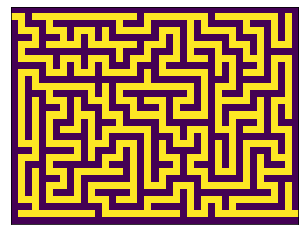

In [1]:
import random
import matplotlib.pyplot as plt


class Maillon:

	def __init__(self, valeur, suivant=None):
		self.valeur = valeur
		self.suivant = suivant



class Pile:

	def __init__(self):
		self.taille = 0 # nombre d'assiettes dans la pile
		self.sommet = None


	def empiler(self, valeur):
		self.sommet = Maillon(valeur, self.sommet)
		self.taille += 1

	def depiler(self):
		if self.taille > 0:
			valeur = self.sommet.valeur
			self.sommet = self.sommet.suivant
			self.taille -= 1
			return valeur

	def estVide(self):
		return self.taille == 0


	def lireSommet(self):
		return self.sommet.valeur



# Dimensions de la grille:
LARGEUR = 20
HAUTEUR = 15








def voisinage(couple):
	"""
	Renvoie la liste des cellules voisines
	de la cellule (ligne, colonne) = couple dans la grille.
	"""
	listeVoisins = []
	i, j = couple[0], couple[1]
	for d in (-1, 1):
		if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
		if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
	return listeVoisins




def dfs(s) :
	P = {s: None}
	Q = Pile()
	Q.empiler(s)
	while not(Q.estVide()) :
		u = Q.lireSommet()
		R=[y for y in voisinage(u) if y not in P]
		if R :
			v=random.choice(R)
			P[v]=u
			Q.empiler(v)
		else :
			Q.depiler()
	return P



def dedale():
	"""
	Fonction dessinant le résultat
	"""
	labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
	parcours = dfs((0,0))

	for i,j in parcours:
		labyrinthe[2*i+1][2*j+1] = 1
		if (i,j) !=  (0,0):
			k,l = parcours[(i,j)]
			labyrinthe[2*k+1][2*l+1] = 1
			labyrinthe[i+k+1][j+l+1] = 1

	labyrinthe[1][0] = 1
	labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 1

	# le graphique:
	plt.imshow(labyrinthe)
	# on cache les graduations:
	plt.xticks([])
	plt.yticks([])
	# on visualise le résultat:
	plt.show()



dedale()